# ЛАБОРАТОРНА РОБОТА  

## "Алгоритми та моделі перетворення даних"

__Метою__ лабораторної роботи є набуття практичних навичок використання модулів бібліотеки `Scikit-learn` для вирішення наступних задач:

- визначення та розподілення данних по їх типам
- вибір та застосування алгоритмів перетворення різноманітних типів даних
- настроювання параметрів та застосування трансформерів
- побудова конвеєра для автоматизації процесів трансформації даних

__Результатом__ виконання лабораторної роботи повинен стати датасет, в якому колонки з покажчиком перетворені під для навчання моделей

In [1]:
# імпортувати бібліотеки pandas та numpy
import pandas as pd
import numpy as np

## Завдання

Вхідним датасетом є csv-файл, отриманий в результаті виконання лабораторної роботи по конструюванню та очищеню покажчиків даних про продажі квартир рієлторської компанії.

<h4 style='background-color:cyan; color:red; padding:15px'><ul>
    <li>замість `...` вписуйте Ваш програмний код
    <li>не змінюйте імена запропонованих зміних
    </ul>
</h4>

In [3]:
# ззчитати підготовлений датасет `apartments_clean.csv` в датафрейм та проінспектувати його стан
data = pd.read_csv('apartments_clean.csv')
data.head()

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,street,district,area_comfort
0,30970.0,1.0,1106.0,12,13,2013,28.0,13.0,5.0,Петропавлівська,Оболонський,10.0
1,82000.0,2.0,1281.0,18,26,2009,64.0,37.0,14.0,Дніпровська,Оболонський,13.0
2,135000.0,2.0,2077.0,16,23,2012,65.0,25.0,18.0,Дніпровська,Оболонський,22.0
3,84000.0,2.0,1273.0,6,26,2009,66.0,37.0,18.0,Дніпровська,Оболонський,11.0
4,42654.8,1.0,1375.9,8,18,2009,31.0,37.0,14.0,Дніпровська,Оболонський,0.0


## 1. Визначення типів покажчиків вхідного датасету

In [4]:
# відокремити від робочого датасету колонку з цільовим показчиком (`Price`) 
# та вилучити її з обробки
target = pd.DataFrame(data['Price'])
data = data.drop(columns = 'Price')

In [5]:
# для самоперевірки: кількисть рядків в датасетах повинна співпадати!
target.shape, data.shape

((398, 1), (398, 11))

In [6]:
# імпортувати з sklearn модуль, що відповідає за селективний відбір покажчиків
from sklearn.compose import make_column_selector as selector

In [7]:
# побудувати  селектори для вібіру числових та категоріальних колонок
numeric_selector = selector(dtype_exclude=object)
category_selector = selector(dtype_include=object)

In [8]:
# застосувати побудовані селектори для створення списків числових та категоріальних показчиків
numeric_data_columns = numeric_selector(data)
category_data_columns = category_selector(data)

print(f'список числових покажчиків = {numeric_data_columns}')
print(f'список категоріальних покажчиків = {category_data_columns}')

список числових покажчиків = ['rooms', 'price_per_m2', 'level', 'levels', 'year', 'area_total', 'area_living', 'area_kitchen', 'area_comfort']
список категоріальних покажчиків = ['street', 'district']


In [9]:
# створити 2 окремі датасети: числовий та категоріальний та вивести їх основні властивості
data_numeric = data.select_dtypes(exclude=object)
data_category = data.select_dtypes(include=object)

data_numeric.shape, data_category.shape

((398, 9), (398, 2))

## 2. Маштабування числових та категоріальних колонок

### 2.1. Маштабування числових показчиків

In [10]:
# з модуля `preprocessing` імпортувати нормалізатор 'MinMaxScaler' та стандартизатор 'StandardScaler'
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [13]:
# створити відповідні маштабувачі
standart_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [14]:
# побудувати змаштабовані датасети за двома стратегіями: стандартизація та нормалізація
data_numeric_std = standart_scaler.fit_transform(data_numeric)
data_numeric_min_max= min_max_scaler.fit_transform(data_numeric)

<AxesSubplot: title={'center': 'Нормалізація'}, ylabel='Frequency'>

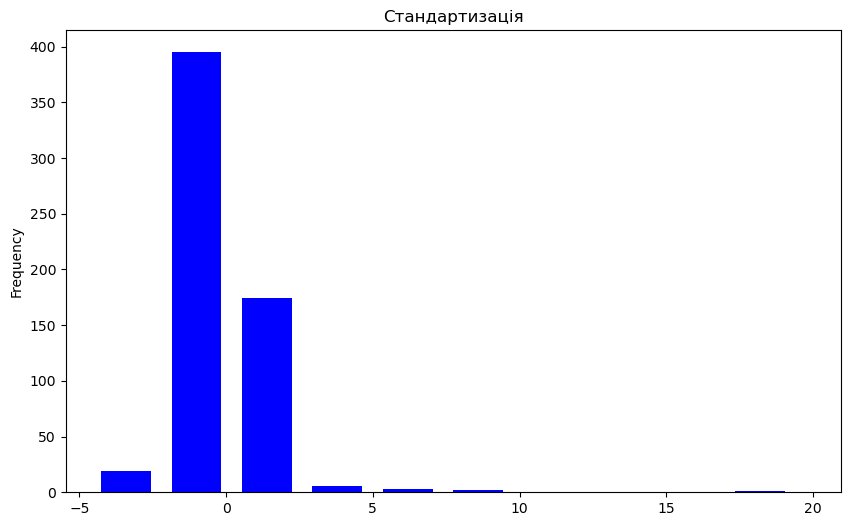

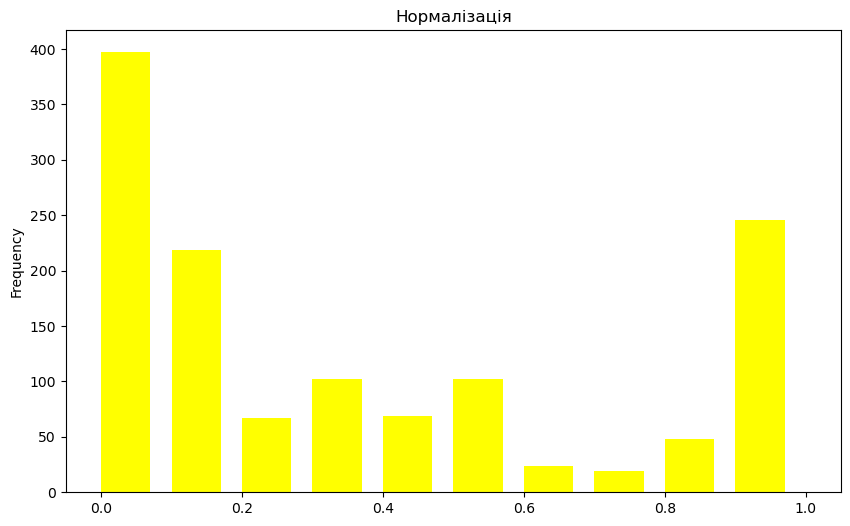

In [16]:
# побудувати графіки розподілення значень показчиків при
# стандартном та нормалізованом маштабуванні
pd.DataFrame(data_numeric_std).plot(kind='hist', legend=False, color='blue',figsize=[10, 6], width=1.7, title='Стандартизація')
pd.DataFrame(data_numeric_min_max).plot(kind='hist', legend=False, color='yellow',figsize=[10, 6], width=0.07, title='Нормалізація')

#####  __проаналізувати графіки та визначись який маштабувач краще підходить до числовї підмножини робочого датасету__

### 2.1. Маштабування категоріальних показчиків

In [17]:
# з модуля `preporcessing` імпортувати кодувальники 'OrdinalEncoder' та 'OneHotEncoder'
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [18]:
# проаналізувати категоріальні показчики та визначитись до якого показчика
# який енкодер доцільно застосовувати
ordinal_encoder = OrdinalEncoder()
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [21]:
# створити енкодери та закодувати ними відповідні категоріальні колонки
data_cat_oridin = ordinal_encoder.fit_transform(data_category.iloc[:,2:])
data_cat_one_hot = one_hot_encoder.fit_transform(data_category.iloc[:,:2])
print(data_cat_oridin.shape)
print(data_cat_one_hot.shape)

(398, 0)
(398, 186)


## 3. Побудова трансформера для підготовки даних

In [22]:
# з модуля `compose` імпортувати трансформер колонок `ColumnTransformer`
from sklearn.compose import ColumnTransformer

In [24]:
# побудувати трансформер для предобробки числових та категоріальних показчиків
# робочого датасету
transformer = ColumnTransformer([
    ('ord_categirical_encoder', OrdinalEncoder(), ['district']),
    ('ohe_categirical_encoder', OneHotEncoder(sparse_output=False), ['street']),
    ('numeric_encoder', standart_scaler, numeric_data_columns)
])
print(transformer)

ColumnTransformer(transformers=[('ord_categirical_encoder', OrdinalEncoder(),
                                 ['district']),
                                ('ohe_categirical_encoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['street']),
                                ('numeric_encoder', StandardScaler(),
                                 ['rooms', 'price_per_m2', 'level', 'levels',
                                  'year', 'area_total', 'area_living',
                                  'area_kitchen', 'area_comfort'])])


In [25]:
# отримати вихідний масив застосував трансфомер до вхідного датасуту
data_transformed = transformer.fit_transform(data)
data_transformed.shape

(398, 174)

In [26]:
# побудувати вихідний датафрейм з вихідного масиву додавши в першу колонку
# ціловий показчик `target`
data_transformed = pd.DataFrame(data_transformed, columns=transformer.get_feature_names_out())
target = pd.DataFrame(target)

apartment_transformed = pd.concat([target, data_transformed], axis=1)
apartment_transformed

,Price,ord_categirical_encoder__district,ohe_categirical_encoder__street_Інститутська,ohe_categirical_encoder__street_Іскрівська,ohe_categirical_encoder__street_Автозаводська,ohe_categirical_encoder__street_Азербайджанська,ohe_categirical_encoder__street_Антоновича,ohe_categirical_encoder__street_Багговутівська,ohe_categirical_encoder__street_Балтійський,ohe_categirical_encoder__street_Басейна,...,ohe_categirical_encoder__street_Ясинуватський,numeric_encoder__rooms,numeric_encoder__price_per_m2,numeric_encoder__level,numeric_encoder__levels,numeric_encoder__year,numeric_encoder__area_total,numeric_encoder__area_living,numeric_encoder__area_kitchen,numeric_encoder__area_comfort
0,30970.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.125471,-0.139455,0.433273,-0.514829,0.565990,-1.048667,-1.011456,-1.185698,-0.424751
1,82000.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.160089,-0.117124,1.339278,1.027572,0.402370,-0.287044,-0.148058,-0.165479,-0.315639
2,135000.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.160089,-0.015546,1.037276,0.671633,0.525085,-0.265888,-0.579757,0.287951,0.011697
3,84000.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.160089,-0.118144,-0.472731,1.027572,0.402370,-0.244731,-0.148058,0.287951,-0.388380
4,42654.8,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.125471,-0.105013,-0.170729,0.078402,0.402370,-0.985198,-0.148058,-0.165479,-0.788458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,42900.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.160089,-0.153237,-1.227735,-1.463999,0.402370,-0.731324,-0.435857,-0.165479,-0.788458
394,115000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.125471,0.052981,-1.076734,-1.226707,0.811420,-0.710168,-0.975481,0.628024,-0.461122
395,39000.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.125471,-0.134223,-0.925733,-1.463999,-1.601977,-0.921730,-0.831582,-0.845625,-0.497492
396,115000.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.805294,-0.135755,0.584274,0.908926,0.197845,-0.181263,-0.148058,-0.165479,-0.133786


In [27]:
# Проінспектувати вихідний датасет `apartment_transformed`
apartment_transformed.describe()

,Price,ord_categirical_encoder__district,ohe_categirical_encoder__street_Інститутська,ohe_categirical_encoder__street_Іскрівська,ohe_categirical_encoder__street_Автозаводська,ohe_categirical_encoder__street_Азербайджанська,ohe_categirical_encoder__street_Антоновича,ohe_categirical_encoder__street_Багговутівська,ohe_categirical_encoder__street_Балтійський,ohe_categirical_encoder__street_Басейна,...,ohe_categirical_encoder__street_Ясинуватський,numeric_encoder__rooms,numeric_encoder__price_per_m2,numeric_encoder__level,numeric_encoder__levels,numeric_encoder__year,numeric_encoder__area_total,numeric_encoder__area_living,numeric_encoder__area_kitchen,numeric_encoder__area_comfort
count,3.980000e+02,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,2.063534e+05,11.087940,0.005025,0.002513,0.002513,0.002513,0.025126,0.017588,0.017588,0.002513,...,0.005025,-1.338962e-16,-4.016887e-17,7.141133e-17,8.926416e-17,-1.267551e-15,4.463208e-18,-5.355850e-17,-8.926416e-17,5.802171e-17
std,8.248727e+05,6.195782,0.070799,0.050125,0.050125,0.050125,0.156704,0.131614,0.131614,0.050125,...,0.070799,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,3.097000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.125471e+00,-2.195947e-01,-1.227735e+00,-1.819938e+00,-4.260805e+00,-1.112135e+00,-1.119381e+00,-1.412414e+00,-7.884580e-01
25%,6.500000e+04,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.125471e+00,-1.324049e-01,-7.747324e-01,-9.894143e-01,-2.112057e-01,-5.779414e-01,-3.998823e-01,-5.055524e-01,-4.611218e-01
50%,1.000000e+05,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.600886e-01,-8.343437e-02,-1.707295e-01,7.840191e-02,4.023699e-01,-1.812628e-01,-1.480577e-01,-1.654794e-01,-1.701563e-01
75%,1.637500e+05,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,8.052941e-01,-1.761931e-02,5.842742e-01,9.089256e-01,6.068951e-01,1.995486e-01,1.307481e-01,6.123593e-02,1.571798e-01
max,1.570000e+07,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,4.666825e+00,1.975424e+01,3.604289e+00,3.519143e+00,8.932304e-01,6.821437e+00,1.003285e+01,7.089411e+00,1.008638e+01


In [28]:
apartment_transformed.shape

(398, 175)

In [29]:
# зберегти підготовлений датасет в csv-файлі `apartment_transformed.csv`
apartment_transformed.to_csv('apartment_transformed.csv')